
.. redirect-from:: /users/customizing
.. redirect-from:: /tutorials/introductory/customizing


# Customizing Matplotlib with style sheets and rcParams

Tips for customizing the properties and default styles of Matplotlib.

There are three ways to customize Matplotlib:

1. `Setting rcParams at runtime<customizing-with-dynamic-rc-settings>`.
2. `Using style sheets<customizing-with-style-sheets>`.
3. `Changing your matplotlibrc file<customizing-with-matplotlibrc-files>`.

Setting rcParams at runtime takes precedence over style sheets, style
sheets take precedence over :file:`matplotlibrc` files.


## Runtime rc settings

You can dynamically change the default rc (runtime configuration)
settings in a python script or interactively from the python shell. All
rc settings are stored in a dictionary-like variable called
:data:`matplotlib.rcParams`, which is global to the matplotlib package.
See `matplotlib.rcParams` for a full list of configurable rcParams.
rcParams can be modified directly, for example:


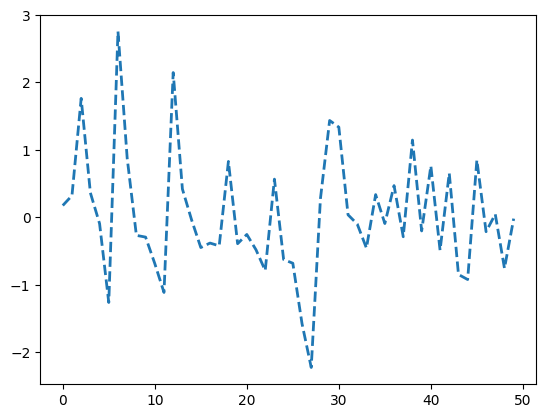

In [1]:
from cycler import cycler

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
data = np.random.randn(50)
plt.plot(data)

Note, that in order to change the usual `~.Axes.plot` color you have to
change the *prop_cycle* property of *axes*:



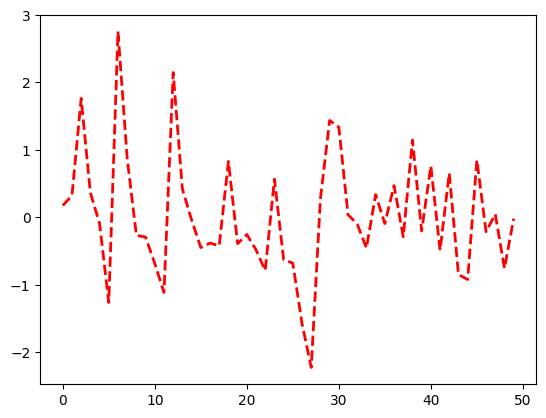

In [2]:
mpl.rcParams['axes.prop_cycle'] = cycler(color=['r', 'g', 'b', 'y'])
plt.plot(data)  # first color is red

Matplotlib also provides a couple of convenience functions for modifying rc
settings. `matplotlib.rc` can be used to modify multiple
settings in a single group at once, using keyword arguments:



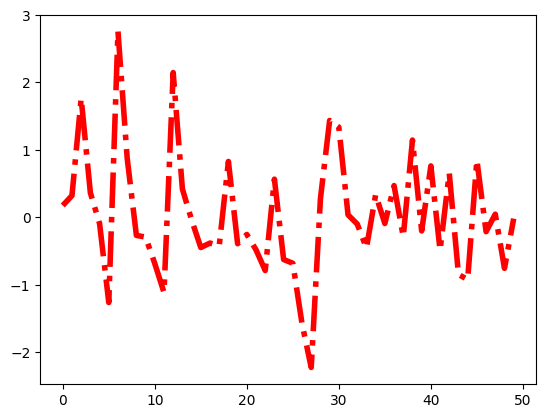

In [3]:
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot(data)

### Temporary rc settings

The :data:`matplotlib.rcParams` object can also be changed temporarily using
the `matplotlib.rc_context` context manager:



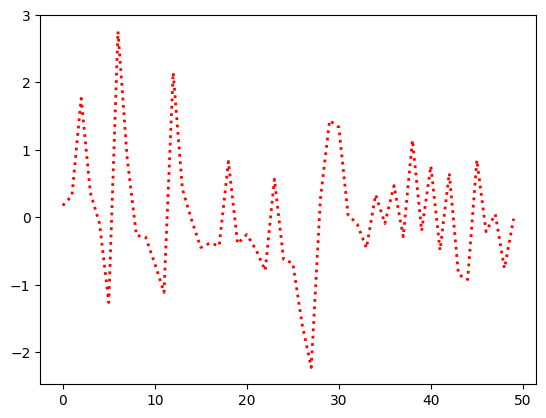

In [4]:
with mpl.rc_context({'lines.linewidth': 2, 'lines.linestyle': ':'}):
    plt.plot(data)

`matplotlib.rc_context` can also be used as a decorator to modify the
defaults within a function:



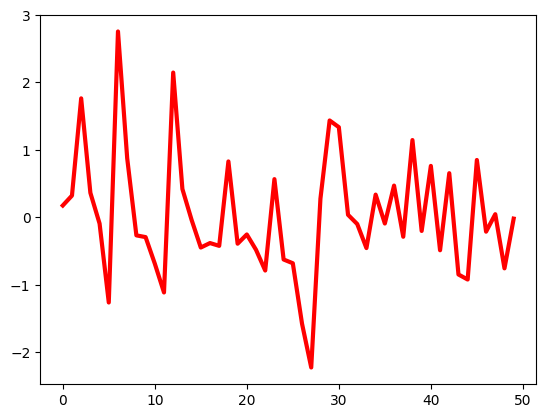

In [5]:
@mpl.rc_context({'lines.linewidth': 3, 'lines.linestyle': '-'})
def plotting_function():
    plt.plot(data)

plotting_function()

`matplotlib.rcdefaults` will restore the standard Matplotlib
default settings.

There is some degree of validation when setting the values of rcParams, see
:mod:`matplotlib.rcsetup` for details.




## Using style sheets

Another way to change the visual appearance of plots is to set the
rcParams in a so-called style sheet and import that style sheet with
`matplotlib.style.use`. In this way you can switch easily between
different styles by simply changing the imported style sheet. A style
sheets looks the same as a `matplotlibrc<matplotlibrc-sample>`
file, but in a style sheet you can only set rcParams that are related
to the actual style of a plot. Other rcParams, like *backend*, will be
ignored. :file:`matplotlibrc` files support all rcParams. The
rationale behind this is to make style sheets portable between
different machines without having to worry about dependencies which
might or might not be installed on another machine. For a full list of
rcParams see `matplotlib.rcParams`. For a list of rcParams that are
ignored in style sheets see `matplotlib.style.use`.

There are a number of pre-defined styles :doc:`provided by Matplotlib
</gallery/style_sheets/style_sheets_reference>`. For
example, there's a pre-defined style called "ggplot", which emulates the
aesthetics of ggplot_ (a popular plotting package for R_). To use this
style, add:



In [6]:
plt.style.use('ggplot')

To list all available styles, use:



In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Defining your own style

You can create custom styles and use them by calling `.style.use` with
the path or URL to the style sheet.

For example, you might want to create
``./images/presentation.mplstyle`` with the following::

   axes.titlesize : 24
   axes.labelsize : 20
   lines.linewidth : 3
   lines.markersize : 10
   xtick.labelsize : 16
   ytick.labelsize : 16

Then, when you want to adapt a plot designed for a paper to one that looks
good in a presentation, you can just add::

   >>> import matplotlib.pyplot as plt
   >>> plt.style.use('./images/presentation.mplstyle')


### Distributing styles

You can include style sheets into standard importable Python packages (which
can be e.g. distributed on PyPI).  If your package is importable as
``import mypackage``, with a ``mypackage/__init__.py`` module, and you add
a ``mypackage/presentation.mplstyle`` style sheet, then it can be used as
``plt.style.use("mypackage.presentation")``.  Subpackages (e.g.
``dotted.package.name``) are also supported.

Alternatively, you can make your style known to Matplotlib by placing
your ``<style-name>.mplstyle`` file into ``mpl_configdir/stylelib``.  You
can then load your custom style sheet with a call to
``style.use(<style-name>)``.  By default ``mpl_configdir`` should be
``~/.config/matplotlib``, but you can check where yours is with
`matplotlib.get_configdir()`; you may need to create this directory. You
also can change the directory where Matplotlib looks for the stylelib/
folder by setting the :envvar:`MPLCONFIGDIR` environment variable, see
`locating-matplotlib-config-dir`.

Note that a custom style sheet in ``mpl_configdir/stylelib`` will override a
style sheet defined by Matplotlib if the styles have the same name.

Once your ``<style-name>.mplstyle`` file is in the appropriate
``mpl_configdir`` you can specify your style with::

   >>> import matplotlib.pyplot as plt
   >>> plt.style.use(<style-name>)


### Composing styles

Style sheets are designed to be composed together. So you can have a style
sheet that customizes colors and a separate style sheet that alters element
sizes for presentations. These styles can easily be combined by passing
a list of styles::

   >>> import matplotlib.pyplot as plt
   >>> plt.style.use(['dark_background', 'presentation'])

Note that styles further to the right will overwrite values that are already
defined by styles on the left.


### Temporary styling

If you only want to use a style for a specific block of code but don't want
to change the global styling, the style package provides a context manager
for limiting your changes to a specific scope. To isolate your styling
changes, you can write something like the following:



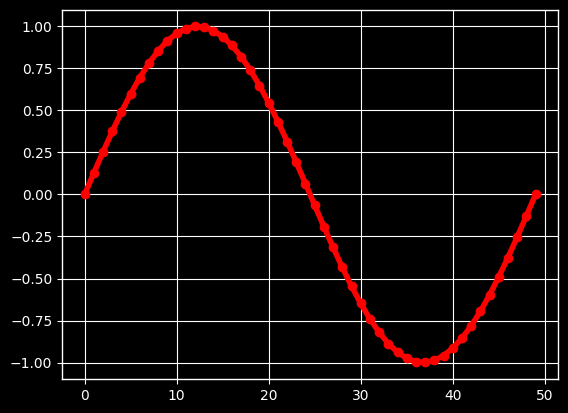

In [8]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()


## The :file:`matplotlibrc` file

Matplotlib uses :file:`matplotlibrc` configuration files to customize all
kinds of properties, which we call 'rc settings' or 'rc parameters'. You can
control the defaults of almost every property in Matplotlib: figure size and
DPI, line width, color and style, axes, axis and grid properties, text and
font properties and so on. The :file:`matplotlibrc` is read at startup to
configure Matplotlib. Matplotlib looks for :file:`matplotlibrc` in four
locations, in the following order:

1. :file:`matplotlibrc` in the current working directory, usually used for
   specific customizations that you do not want to apply elsewhere.

2. :file:`$MATPLOTLIBRC` if it is a file, else
   :file:`$MATPLOTLIBRC/matplotlibrc`.

3. It next looks in a user-specific place, depending on your platform:

   - On Linux and FreeBSD, it looks in
     :file:`.config/matplotlib/matplotlibrc` (or
     :file:`$XDG_CONFIG_HOME/matplotlib/matplotlibrc`) if you've customized
     your environment.

   - On other platforms, it looks in :file:`.matplotlib/matplotlibrc`.

   See `locating-matplotlib-config-dir`.

4. :file:`{INSTALL}/matplotlib/mpl-data/matplotlibrc`, where
   :file:`{INSTALL}` is something like
   :file:`/usr/lib/python3.9/site-packages` on Linux, and maybe
   :file:`C:\\Python39\\Lib\\site-packages` on Windows. Every time you
   install matplotlib, this file will be overwritten, so if you want
   your customizations to be saved, please move this file to your
   user-specific matplotlib directory.

Once a :file:`matplotlibrc` file has been found, it will *not* search
any of the other paths. When a
`style sheet<customizing-with-style-sheets>` is given with
``style.use('<path>/<style-name>.mplstyle')``, settings specified in
the style sheet take precedence over settings in the
:file:`matplotlibrc` file.

To display where the currently active :file:`matplotlibrc` file was
loaded from, one can do the following::

  >>> import matplotlib
  >>> matplotlib.matplotlib_fname()
  '/home/foo/.config/matplotlib/matplotlibrc'

See below for a sample `matplotlibrc file<matplotlibrc-sample>`
and see `matplotlib.rcParams` for a full list of configurable rcParams.


### The default :file:`matplotlibrc` file

.. literalinclude:: ../../../lib/matplotlib/mpl-data/matplotlibrc



